In [396]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

In [397]:
class NN():
    """A neural network with one hidden layer
    """
    def __init__(self, ninputs, nhidden, noutput=1):
        self.w = random((ninputs+1, nhidden))
        self.v = random((nhidden+1, noutput))

    def predict(self, xt):
        xt = np.atleast_2d(xt)
        ox = np.atleast_2d(np.ones_like(xt[:,0])).T
        xt = np.hstack([xt, ox])

        self.z = self.sigmoid(xt @ self.w)
        oz = np.atleast_2d(np.ones_like(self.z[:,0])).T
        self.z = np.hstack([self.z, oz])
        self.yp = self.z @ self.v
        return self.yp

    def fit(self, xt, yt, lr=0.5):
        xt = np.atleast_2d(xt)
        # One-pad xt for bias
        ox = np.atleast_2d(np.ones_like(xt[:,0])).T
        xtp = np.hstack([xt, ox])

        yp = self.predict(xt)
        yt = np.atleast_2d(yt)

        e = yt - yp

        # Calc output layer weight delta
        delta_v = lr * self.z.T @ e
        assert delta_v.shape == self.v.shape
        try:
            assert not(np.isnan(delta_v[0,0]))
        except AssertionError:
            raise AssertionError('delta_v is NaN')

        # Calc hidden layer weight delta
        delta_w = lr * xtp.T @ ((e @ self.v.T) * self.derivative(self.z))
        delta_w = delta_w[:,:-1]  # Shave off the bias from the output layer
        try:
            assert delta_w.shape == self.w.shape
        except AssertionError as ae:
            raise AssertionError(f"delta_w shape: {delta_w.shape}, w shape: {self.w.shape}")
        try:
            assert not(np.isnan(delta_w[0,0]))
        except AssertionError:
            raise AssertionError('delta_w is NaN')

        # Update layer weights
        self.v += delta_v
        self.w += delta_w

        return (yt - yp)[0,0]**2

    def sigmoid(self, x):
        return 1 / (1 - np.exp(-x))

    def derivative(self, x):
        return x * (1 - x)

    def error(self, xv, yv):
        yp = self.predict(xv)
        es = yv - yp

    def rmse(self, xv, yv):
        yp = self.predict(xv)
        es = (yt - yp)**2
        return np.sum(es)

In [398]:
x = random((20000, 3))
y = x[:, 0]**3 - 2 * x[:,1] + 4 * x[:,2]
y = np.atleast_2d(y).T
print(y.shape)

(20000, 1)


In [399]:
net = NN(ninputs=3, nhidden=5)

In [400]:
net.predict(x[0])[0,0]

6.556994379278607

In [401]:
print('Iter \t\tTrue\t\tPred\t\tPE \t\tSE ')
print('-----\t\t----\t\t----\t\t---\t\t---')
count = 0
ses = []
for epoch in range(10):
    for xt, yt in zip(x, y):
        yp = net.predict(xt)
        e = 100 * (yp - yt) / yt
        e = e[0,0]

        se = net.fit(xt, yt, lr=0.001)
        ses.append(se)
        
        if count % 1000 == 0:
            print(f'{count}\t\t{yt[0]:0.3f}\t\t{yp[0,0]:0.3f}\t\t{e:0.3f}\t\t{se:0.3f}')
        count += 1

Iter 		True		Pred		PE 		SE 
-----		----		----		---		---
0		2.482		6.557		164.181		16.606
1000		2.674		1.082		-59.547		2.535
2000		1.245		1.219		-2.122		0.001
3000		0.417		1.275		205.375		0.735
4000		3.426		1.358		-60.368		4.279
5000		2.094		1.399		-33.192		0.483
6000		1.433		1.063		-25.787		0.137
7000		0.839		1.338		59.440		0.249
8000		-0.531		0.996		-287.569		2.331
9000		-1.374		0.944		-168.715		5.375
10000		-0.947		0.852		-190.023		3.236
11000		-1.156		0.997		-186.300		4.636
12000		2.023		1.601		-20.851		0.178
13000		3.533		3.212		-9.100		0.103
14000		-0.295		-0.506		71.249		0.044
15000		1.781		1.528		-14.161		0.064
16000		2.151		2.264		5.258		0.013
17000		-0.031		0.350		-1244.009		0.145
18000		-1.073		-0.460		-57.168		0.376
19000		1.680		1.772		5.438		0.008
20000		2.482		2.157		-13.109		0.106
21000		2.674		2.406		-10.024		0.072
22000		1.245		1.361		9.279		0.013
23000		0.417		0.596		42.875		0.032
24000		3.426		3.514		2.560		0.008
25000		2.094		1.941		-7.319		0.023
26000		1.433		1.518

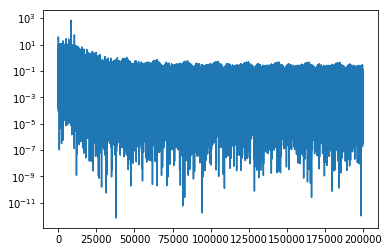

In [402]:
plt.plot(ses)
plt.yscale('log')